In [ ]:
%pip install pycaret

# New section

In [ ]:
from pandas import *
from numpy import *
from datetime import datetime
from numpy import*
from pycaret import*
import lightgbm as lgb
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from matplotlib.figure import Figure
from matplotlib import style
import matplotlib.dates as mdates
import plotly
import cufflinks as cf

cf.go_offline

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(color_codes=True)

In [18]:
# load dataset

from pycaret.datasets import get_data
insurance = get_data('insurance')

# init environment
from pycaret.regression import *
r0 = setup(insurance,
           target = 'charges',
           session_id = 122,
           log_experiment=True, 
           experiment_name='insurance1'
           )
#Model training and selection
print("Model training and selection")
best_lr= compare_models(fold=5)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,Description,Value
0,Session id,122
1,Target,charges
2,Target type,Regression
3,Data shape,"(1338, 10)"
4,Train data shape,"(936, 10)"
5,Test data shape,"(402, 10)"
6,Ordinal features,2
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


2022/10/21 16:51:07 INFO mlflow.tracking.fluent: Experiment with name 'insurance1' does not exist. Creating a new experiment.


Model training and selection


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2605.6394,22740007.7270,4737.6568,0.8426,0.4128,0.2816,0.1520
rf,Random Forest Regressor,2740.0755,24942954.8313,4974.9741,0.8267,0.4327,0.2951,0.4080
lightgbm,Light Gradient Boosting Machine,2956.6121,25304499.4337,5008.6817,0.8247,0.5289,0.3512,0.7920
catboost,CatBoost Regressor,2826.1466,25275447.3094,5009.5254,0.8243,0.4665,0.3131,0.9980
ada,AdaBoost Regressor,4080.4413,28427002.5255,5307.3833,0.8038,0.6114,0.6815,0.0960
et,Extra Trees Regressor,2840.0123,29400453.7710,5410.5159,0.7937,0.4650,0.3203,0.2580
br,Bayesian Ridge,4235.4964,38476268.0853,6167.9235,0.7340,0.6544,0.4331,0.0860
llar,Lasso Least Angle Regression,4222.9234,38480010.0547,6168.6525,0.7340,0.6110,0.4306,0.0880
lar,Least Angle Regression,4228.5979,38475538.1143,6168.1649,0.7340,0.6352,0.4319,0.0780
ridge,Ridge Regression,4241.1135,38481459.5088,6168.1009,0.7340,0.6259,0.4340,0.0820


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [19]:
# Analyse best model
print('Analyse best model')
evaluate_model(best_lr)

Analyse best model


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [36]:
# Predictions on new data
print("Predictions on new data")
model = create_model(best_lr)
predictions = predict_model(model)

Predictions on new data


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3217.8061,37447244.7270,6119.4154,0.7721,0.4660,0.2958
1,2613.9892,20874780.7597,4568.8927,0.8733,0.3198,0.2374
2,2969.9974,29383854.7753,5420.6877,0.8161,0.3652,0.2404
3,2656.8086,26199161.4943,5118.5116,0.8285,0.4181,0.2642
4,1990.0186,15583379.1825,3947.5789,0.9049,0.3526,0.2579
5,2536.7566,20862532.3925,4567.5521,0.8270,0.4285,0.2490
6,2073.3710,10759749.0092,3280.2056,0.9186,0.3184,0.2552
7,2967.2002,28918079.8442,5377.5533,0.8185,0.5276,0.2989
8,2558.2333,17401240.0267,4171.4794,0.8592,0.3261,0.2603


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2461.9609,18266372.6445,4273.9177,0.8783,0.4222,0.2525


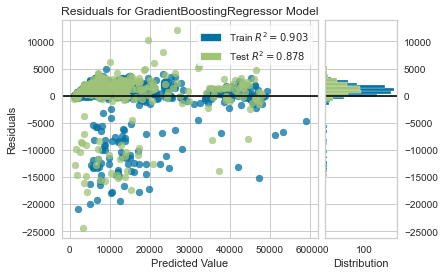

In [24]:
plot_model(model)

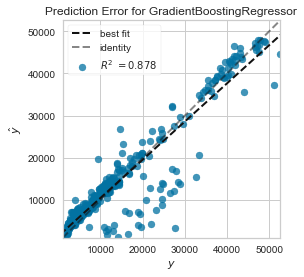

In [26]:
plot_model(model, plot= 'error')

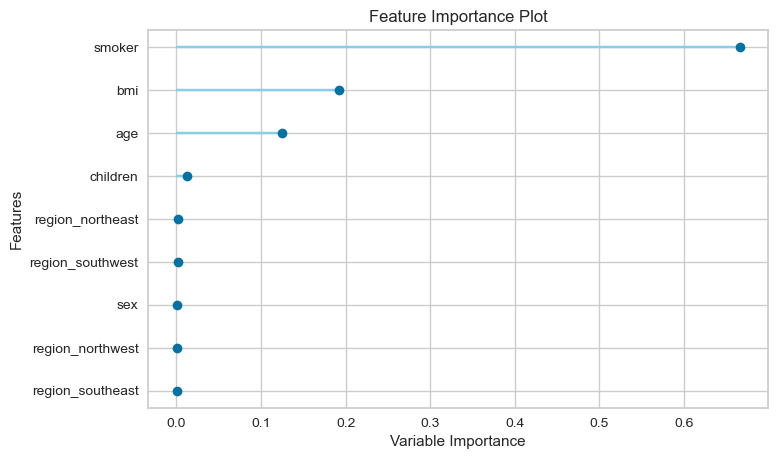

In [27]:
plot_model(model, plot= 'feature')

In [41]:
pred = predict_model(model)
pred = pred.rename(columns={"prediction_label":"Label"})
pred.head() 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2461.9609,18266372.6445,4273.9177,0.8783,0.4222,0.2525


,age,sex,bmi,children,smoker,region_southeast,region_northeast,region_northwest,region_southwest,charges,Label
936,47.0,0.0,32.000000,1.0,0.0,0.0,0.0,0.0,1.0,8551.346680,9675.945455
937,49.0,1.0,30.299999,0.0,0.0,0.0,0.0,0.0,1.0,8116.680176,9646.647798
938,35.0,1.0,34.770000,2.0,0.0,0.0,0.0,1.0,0.0,5729.005371,7834.242785
939,37.0,1.0,30.875000,3.0,0.0,0.0,0.0,1.0,0.0,6796.863281,8054.114617
940,29.0,1.0,33.345001,2.0,0.0,0.0,0.0,1.0,0.0,19442.353516,6693.952915


In [54]:
new_data = insurance.copy()
new_data.drop(['charges'], axis=1, inplace=True)
predict_new = predict_model(model, data=new_data)
predict_new.head()

,age,sex,bmi,children,smoker,region_southeast,region_northeast,region_northwest,region_southwest,prediction_label
0,19.0,0.0,27.900000,0.0,1.0,0.0,0.0,0.0,1.0,18390.053387
1,18.0,1.0,33.770000,1.0,0.0,1.0,0.0,0.0,0.0,2152.512506
2,28.0,1.0,33.000000,3.0,0.0,1.0,0.0,0.0,0.0,6085.999834
3,33.0,1.0,22.705000,0.0,0.0,0.0,0.0,1.0,0.0,4279.534413
4,32.0,1.0,28.879999,0.0,0.0,0.0,0.0,1.0,0.0,4092.665354


In [55]:
# save pipeline/model
print("save pipeline/model")
save_model(model,'MLOps_Pipeline')

save pipeline/model
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/var/folders/sg/8dmzq1nn0wl6qmndt2sf_m1r0000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(fill_value='constant',
                                                               strategy='constant'))),
                 ('or...
                                                                         {'col': 'smoker',
                                                                          'mapping': {nan: -1,
                                                                                      'no': 0,
                                                                                      'yes': 1}}]))),
                 ('onehot_encodin

In [46]:
pipeline1= load_model('MLOps_Pipeline')

Transformation Pipeline and Model Successfully Loaded


In [51]:
from sklearn import set_config
set_config(display='diagram')
pipeline1[0]


TransformerWrapper(include=['age', 'bmi', 'children'],
                   transformer=SimpleImputer())

#Model training and selection
print("Model training and selection")
best_lr= compare_models()

# Analyse best model
print('Analyse best model')
evaluate_model(best_lr)

# Predictions on new data
print("Predictions on new data")
predictions = predict_model(best_lr)

# save pipeline/model
print("save pipeline/model")
save_model(best_lr,'MLOps_Pipeline')

r1 = setup(insurance,
           target = 'Label',
           session_id = 123,
           normalize = True,
           polynomial_features = True,
          #    rigonometry_features = True,
           #feature_interaction=True,
           # bin_numeric_features= ['age', 'bmi']
           )

    #Model training and selection
print("Model training and selection")
best_lr= compare_models()

# Analyse best model
print('Analyse best model')
evaluate_model(best_lr)

# Predictions on new data
print("Predictions on new data")
predictions = predict_model(best_lr)

# save pipeline/model
print("save pipeline/model")
save_model(best_lr,'MLOps_Pipeline')